<a href="https://colab.research.google.com/github/uchenna-okoro/Programming_with_mosh-/blob/master/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [ ]:
# loading csv file to pandas dataframe
insurance_data=pd.read_csv('/content/insurance.csv')


In [ ]:
# The first five rows
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# looking at shape(number of rows and columns) of the columns
insurance_data.shape

(1338, 7)

In [ ]:
# looking information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features

*   Sex
*   Smoker
*   Region




In [ ]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical measures about the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


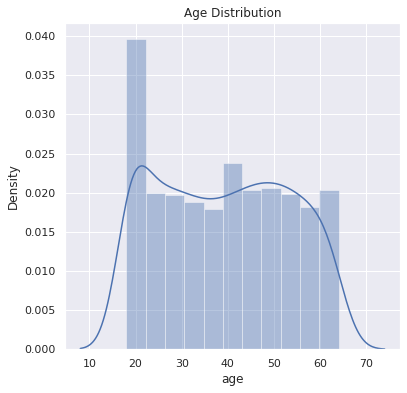

In [ ]:
# distribution of values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

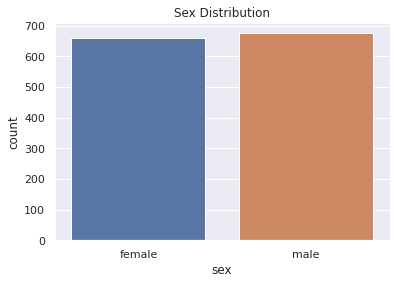

In [ ]:
# Gender column
sns.countplot(x="sex", data=insurance_data)
plt.title("Sex Distribution")
plt.show()

In [ ]:
# taking count
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


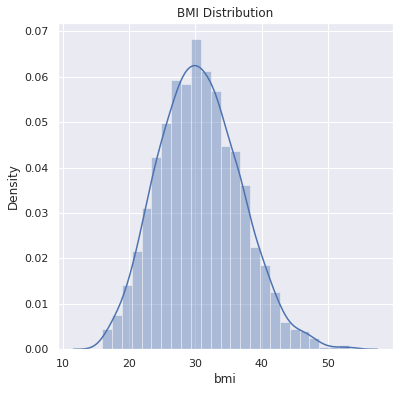

In [ ]:
# BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

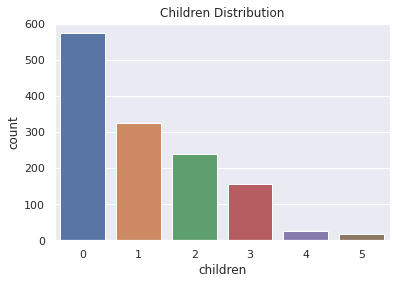

In [ ]:
# children column
sns.countplot(x="children", data=insurance_data)
plt.title("Children Distribution")
plt.show()

In [ ]:
# taking count of children by family
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

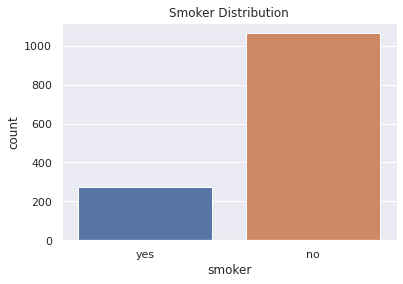

In [ ]:
# smoker column
sns.countplot(x="smoker", data=insurance_data)
plt.title("Smoker Distribution")
plt.show()

In [ ]:
# taking count of smoker by family
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

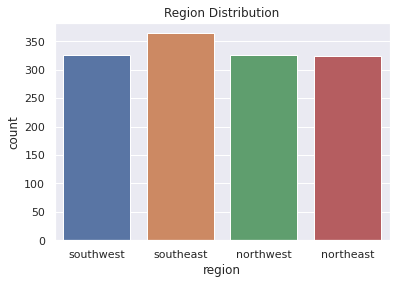

In [ ]:
# smoker column
sns.countplot(x="region", data=insurance_data)
plt.title("Region Distribution")
plt.show()

In [ ]:
# taking count of region by family
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


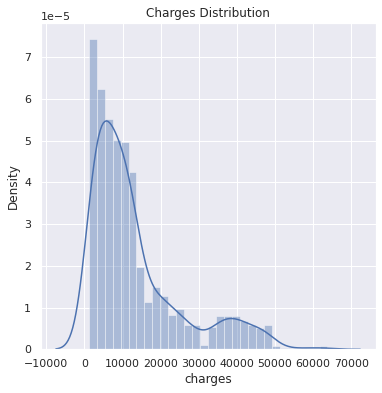

In [ ]:
# distribution of charges

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title("Charges Distribution")
plt.show()

Encoding Categorical features

Data Pre-Processing

In [ ]:
# encoding sex column
insurance_data.replace({"sex":{"male":0,"female":1}},inplace=True)

# encoding smoker column
insurance_data.replace({"smoker":{"yes":0,"no":1}},inplace=True)

# encoding region column
insurance_data.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)



In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting features and Target

In [ ]:
X=insurance_data.drop(columns="charges", axis=1)
y=insurance_data['charges']

print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into train and test data

In [ ]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
# getting the shape of our data 
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1271, 6) (67, 6)


Model Training

Linear Regression

In [ ]:
#loading the linear regression
regressor=LinearRegression()

In [ ]:
# fitting the model'
regressor.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
# predicting on training data
training_data_predict=regressor.predict(X_train)

In [ ]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_predict)
print("R squared value:", r2_train)

R squared value: 0.7492612673525059


In [ ]:
# predicting on training data
test_data_predict=regressor.predict(X_test)

In [ ]:
# R squared value
r2_test=metrics.r2_score(y_test,test_data_predict)
print("R squared value:", r2_test)

R squared value: 0.7606904728933965


Building a Predictive model

In [ ]:
input_data=(31,1,25,0,1,0)

#changing to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the data
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

[3483.21176139]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
